# Visualize the KR map components $s^{\theta}$ and $t^{\tau}$

In [1]:
# Import module. 
using Revise
using PriorNormalization

In [2]:
# Import packages. 
using ApproxFun # for approximating gammainvccdf by a Chebychev interpolant to then use AD
using CairoMakie
using Distributions
using LaTeXStrings
using Plots: Plots, plot, plot!, savefig
Plots.pyplot()
using SpecialFunctions
using StatsFuns

## Parameters of the generalized gamma hyper-prior

In [3]:
# power parameters
r_range = [ 1.0, .5, -.5, -1.0 ]; 
# shape parameters 
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ]; 
# rate parameters 
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ]; 

In [4]:
# We use ApproxFun.jl to build a Chebychev approximation of the function gammainvccdf(β, 1, ⋅) 
interval = -5..5

# Create an array of functions
Γinvccdfchebs_rPos = [ Fun(τ -> gammainvccdf(β, 1, 0.5*erfc(τ/sqrt(2)) ), interval) 
    for β in β_range ]
Γinvccdfchebs_rNeg = [ Fun(τ -> gammainvccdf(β, 1, 0.5 + 0.5*erf(τ/sqrt(2)) ), interval) 
    for β in β_range ]

Γinvccdfchebs = []
for i in 1:4 
    if r_range[i] > 0 
        push!(Γinvccdfchebs, Γinvccdfchebs_rPos[i])
    else 
        push!(Γinvccdfchebs, Γinvccdfchebs_rNeg[i])
    end
end

## Plot the KR map component $s^{\theta}$

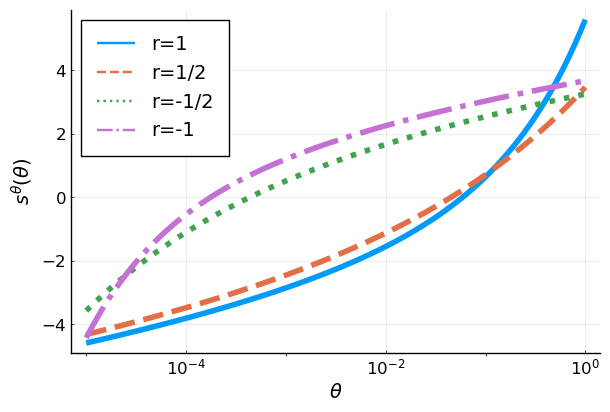

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/figures/KR_map_s1.pdf"

In [18]:
# Create a grid of points
θ_range = 10 .^ range( -5, stop=0, length=100 )
sθ_values = zeros( length(θ_range), 4 )
sθ_values = [ priorNormalizing_KR_sθ( θ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) 
    for θ in θ_range, i in [1,2,3,4] ]

# Create the plot 
plot_sθ = plot( θ_range, sθ_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_sθ, θ_range, sθ_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_sθ, θ_range, sθ_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_sθ, θ_range, sθ_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_sθ, 
    xscale=:log10, xlabel=L"\theta", ylabel=L"s^{\theta}(\theta)", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14, 
    xticks=[10^(-4),10^(-2),10^(0)]
)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, 
    "figures/KR_map_s1.pdf")
savefig(output_filename)

## Plot the KR map component $t^{\tau}$

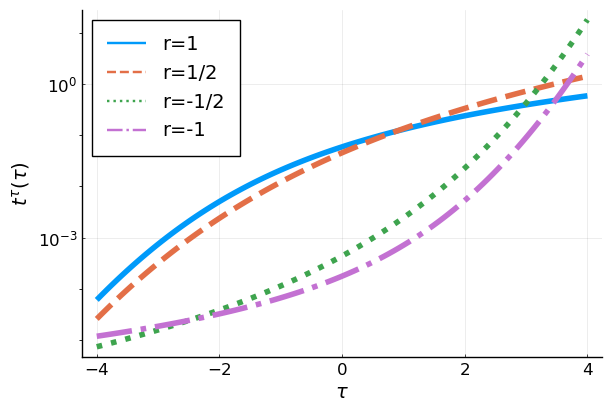

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/figures/KR_map_t1.pdf"

In [19]:
# Create a grid of points
τ_range = range( -4, stop=4, length=100 )
tτ_values = zeros( length(τ_range), 4 )
tτ_values = [ priorNormalizing_KR_inv_tτ( τ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for τ in τ_range, i in [1,2,3,4] ]

# Create the plot 
plot_tτ = plot( τ_range, tτ_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_tτ, τ_range, tτ_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_tτ, τ_range, tτ_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_tτ, τ_range, tτ_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_tτ, 
    xlabel=L"\tau", ylabel=L"t^{\tau}(\tau)", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14, 
    yscale=:log10 
)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, 
    "figures/KR_map_t1.pdf")
savefig(output_filename)

## Plot the KR map component $s^{x|\theta}$

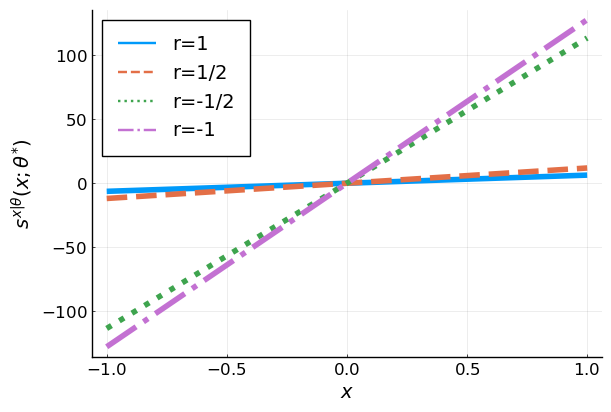

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/figures/KR_map_s2.pdf"

In [16]:
# Choose θ as the mode of the generalized gamma hyper-prior 
θ_modes = ϑ_range .* ( ( r_range.*β_range .- 1 ) ./ r_range ).^(1 ./ r_range ) 

# Create a grid of points
x_range = range( -1, stop=1, length=100 ) 
sx_values = zeros( length(x_range), 4 )
sx_values = [ priorNormalizing_KR_sx( x, θ_modes[i]; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) 
    for x in x_range, i in [1,2,3,4] ]

# Create the plot 
plot_sx = plot( x_range, sx_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_sx, x_range, sx_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_sx, x_range, sx_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_sx, x_range, sx_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot  
plot!( plot_sx, 
    xlabel=L"x", ylabel=L"s^{x|\theta}(x;\theta^{*})", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14
)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, 
    "figures/KR_map_s2.pdf")
savefig(output_filename)

## Plot the KR map component $t^{u|\tau}$

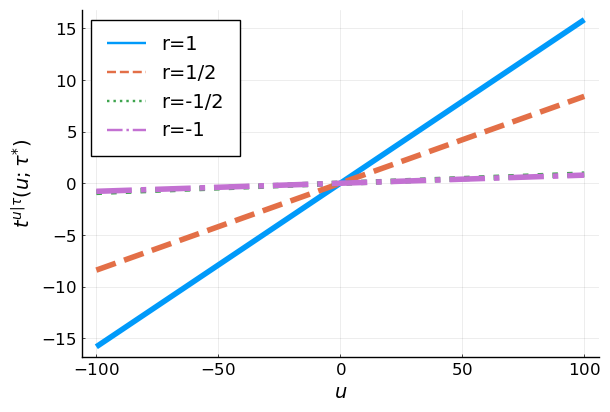

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/figures/KR_map_t2.pdf"

In [17]:
# Choose θ as the mode of the generalized gamma hyper-prior 
τ_modes = zeros( length(θ_modes), 1 )
τ_modes = [ priorNormalizing_KR_sθ( θ_modes[i]; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) 
    for i in [1,2,3,4] ]

# Create a grid of points
u_range = range( -100, stop=100, length=100 ) 
tu_values = zeros( length(u_range), 4 )
tu_values = [ priorNormalizing_KR_inv_tu( u, τ_modes[i]; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for u in u_range, i in [1,2,3,4] ]

# Create the plot 
plot_tu = plot( u_range, tu_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_tu, u_range, tu_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_tu, u_range, tu_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_tu, u_range, tu_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot  
plot!( plot_tu, 
    xlabel=L"u", ylabel=L"t^{u|\tau}(u;\tau^{*})", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14
)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, 
    "figures/KR_map_t2.pdf")
savefig(output_filename)

## Plot $t^{\tau} \circ s^{\theta}$ and $s^{\theta} \circ t^{\tau}$ - sanity check 

Both compositions should be equal to the identity

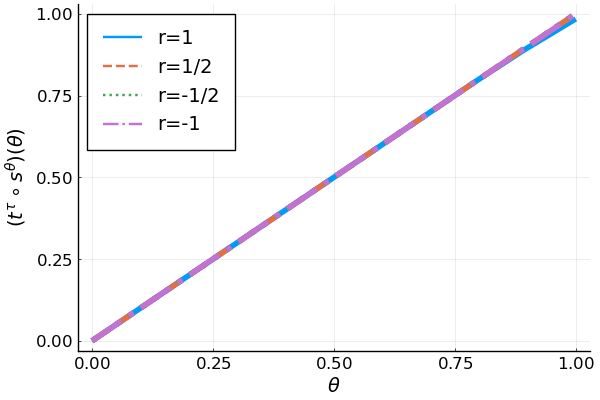

In [9]:
comp_values_aux = [ priorNormalizing_KR_sθ( 
    θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) 
    for θ in θ_range, i in [1,2,3,4] ]
comp_values = zeros( length(θ_range), 4 )

for i in 1:4 
    comp_values[:,i] = [ priorNormalizing_KR_inv_tτ(
        τ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
        for τ in comp_values_aux[:,i] ]
end

# Create the plot 
plot_comp1 = plot( θ_range, comp_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_comp1, θ_range, comp_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_comp1, θ_range, comp_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_comp1, θ_range, comp_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_comp1, 
    xlabel=L"\theta", ylabel=L"( t^{\tau} \circ s^{\theta})(\theta)", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14
)

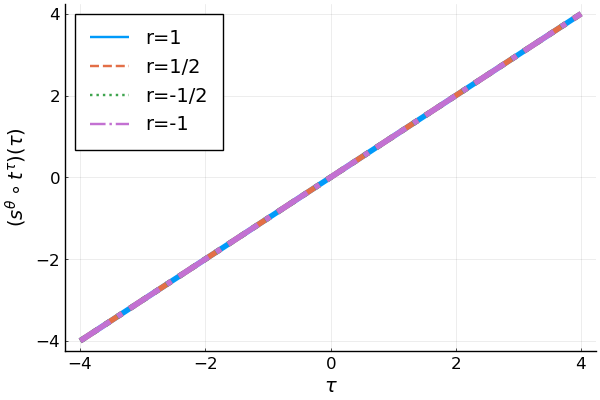

In [10]:
comp_values_aux = [ priorNormalizing_KR_inv_tτ(
        τ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
        for τ in τ_range, i in [1,2,3,4] ]

comp_values = zeros( length(τ_range), 4 )
for i in 1:4 
    comp_values[:,i] = [ priorNormalizing_KR_sθ( 
        θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) 
        for θ in comp_values_aux[:,i] ]
end

# Create the plot 
plot_comp2 = plot( τ_range, comp_values[:,1]; 
    label="r=1", lw=4, ls=:solid )
plot!( plot_comp2, τ_range, comp_values[:,2]; 
    label="r=1/2", lw=4, ls=:dash )
plot!( plot_comp2, τ_range, comp_values[:,3]; 
    label="r=-1/2", lw=4, ls=:dot )
plot!( plot_comp2, τ_range, comp_values[:,4]; 
    label="r=-1", lw=4, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_comp2, 
    xlabel=L"\tau", ylabel=L"( s^{\theta} \circ t^{\tau})(\tau)", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=14, # font sizes 
    legend=:topleft, legendfontsize=14
)

## Plot the pushforward prior $S_{\#} \pi^0$ - sanity check

In [11]:
# Function to evaluate the orginal prior density 
function prior(x, θ; r, β, ϑ) 
    condPrior_distr = Normal( 0, sqrt(θ)) # distribution - conditional prior 
    hyperPrior_distr = GeneralizedGamma(r, β, ϑ) # distribution - hyper-prior
    condPrior_logPDF = logpdf( condPrior_distr, x ) # log-PDF - conditional prior
    hyperPrior_logPDF = logpdf( hyperPrior_distr, θ ) # log-PDF - hyper-prior 
    logPDF = condPrior_logPDF + hyperPrior_logPDF # log-PDF - joint prior 
    return exp( logPDF ) # return the PDF 
end

prior (generic function with 1 method)

In [12]:
# Function to evaluate the pushforward prior
function pushforward_prior( u, τ; r, β, ϑ, Φ::Function ) 
    x, θ = priorNormalizing_KR_inv( u, τ; r, β, ϑ, Φ )
    prior_value = prior(x, θ; r, β, ϑ) 
    normal_distr = Normal( 0, 1) 
    hyperPrior_distr = GeneralizedGamma(r, β, ϑ) # distribution - hyper-prior
    det_value = pdf( normal_distr, τ ) * sqrt( θ ) / pdf( hyperPrior_distr, θ )
    output = prior_value * abs( det_value )
    return output 
end

pushforward_prior (generic function with 1 method)

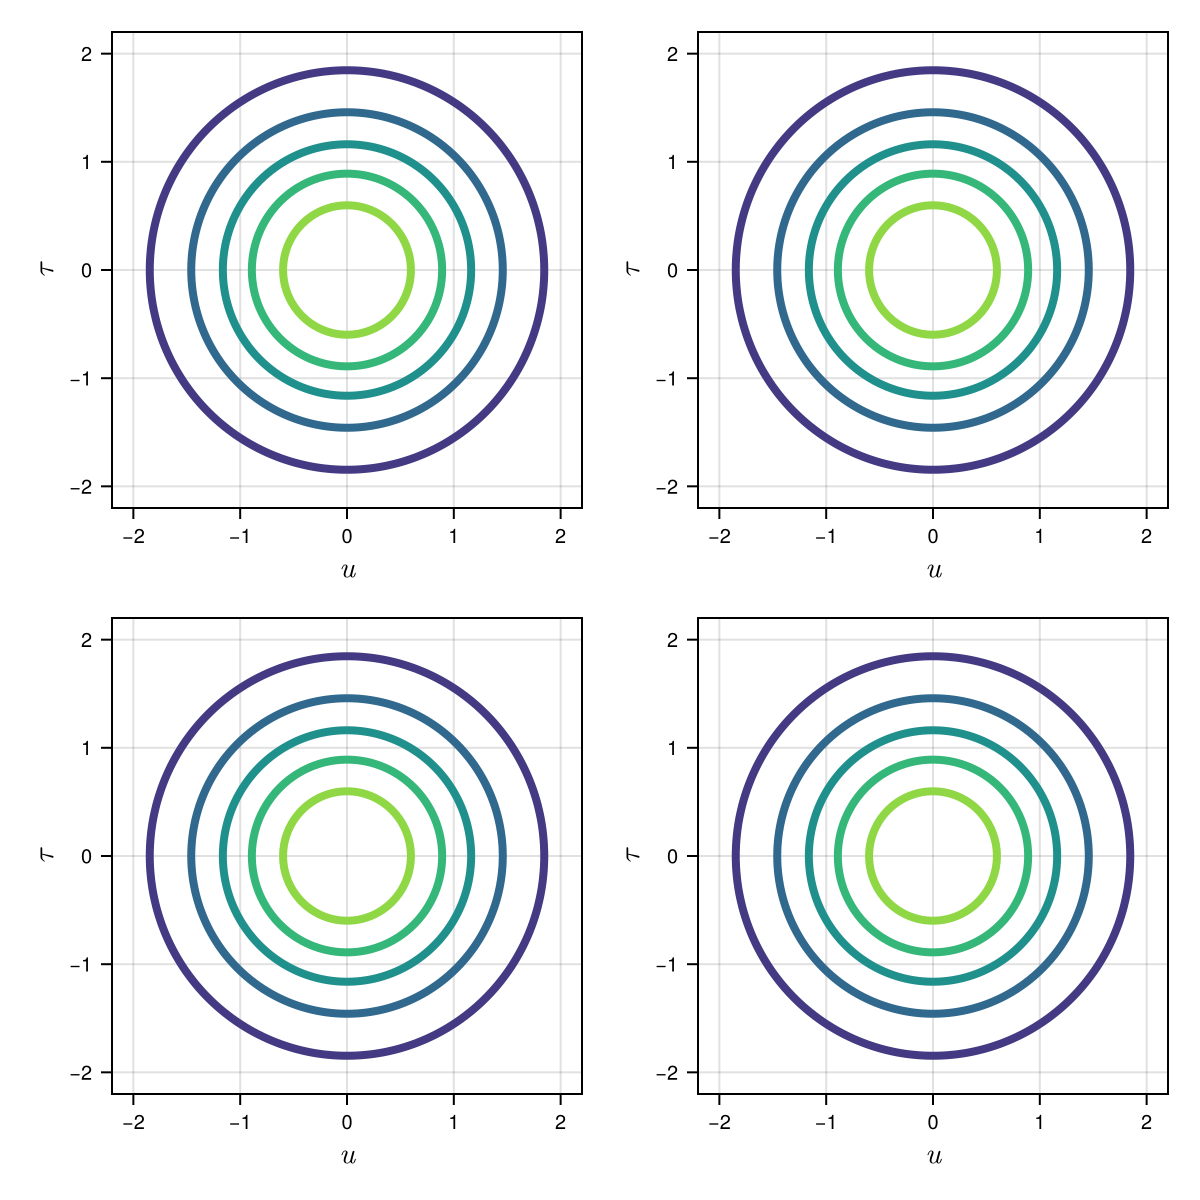

CairoMakie.Screen{IMAGE}


In [13]:
# Generate a grid of values for x and y 
u_range = range( -2, 2, length=100 ) 
τ_range = range( -2, 2, length=100 )

# Start figure 
fig = Figure(size=(600,600))

# Select hyper-hyper-parameters 
i = 1
# Set up plot 
ax = Axis(fig[1, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=15
ax.ylabelsize=15
ax.xticklabelsize=10
ax.yticklabelsize=10  
# Evaluate the pushforward prior PDF at each grid point
pdf_values = [ pushforward_prior( u, τ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for u in u_range, τ in τ_range ]
# generate contour plot 
CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=4) 

# Select hyper-hyper-parameters 
i = 2
# Set up plot 
ax = Axis(fig[1, 2], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=15
ax.ylabelsize=15
ax.xticklabelsize=10
ax.yticklabelsize=10  
# Evaluate the pushforward prior PDF at each grid point
pdf_values = [ pushforward_prior( u, τ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for u in u_range, τ in τ_range ]
# generate contour plot 
CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=4) 

# Select hyper-hyper-parameters 
i = 3
# Set up plot 
ax = Axis(fig[2, 1], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=15
ax.ylabelsize=15
ax.xticklabelsize=10
ax.yticklabelsize=10 
# Evaluate the pushforward prior PDF at each grid point
pdf_values = [ pushforward_prior( u, τ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for u in u_range, τ in τ_range ]
# generate contour plot 
CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=4) 

# Select hyper-hyper-parameters 
i = 4
# Set up plot 
ax = Axis(fig[2, 2], xlabel = L"u", ylabel = L"\tau")
ax.xlabelsize=15
ax.ylabelsize=15
ax.xticklabelsize=10
ax.yticklabelsize=10 
# Evaluate the pushforward prior PDF at each grid point
pdf_values = [ pushforward_prior( u, τ; 
    r=r_range[i], β=β_range[i], ϑ=ϑ_range[i], Φ=Γinvccdfchebs[i] ) 
    for u in u_range, τ in τ_range ]
# generate contour plot 
CairoMakie.contour!(ax, u_range, τ_range, pdf_values; linewidth=4) 

display(fig)